**COURSE PROYECT**

***Make bussiness decisions based on data***

-------------------------------------------------------------------------------------------------------------------------------


**Project Description**

***Context***

You are an analyst at a large online store. Together with the marketing department, you have compiled a list of hypotheses that may help increase revenue.

Your task is to prioritize these hypotheses, launch an A/B test, and analyze the results.

------------------------------------------------------------------------------------------------------------------------------


**Data Description**

**Dataset:** hypotheses_us.csv

*Hypotheses:* Brief descriptions of the hypotheses.

*Reach:* User reach, on a scale from 1 to 10.

*Impact:* Effect on users, on a scale from 1 to 10.

*Confidence:* Confidence level in the hypothesis, on a scale from 1 to 10.

*Effort:* Resources required to test a hypothesis, on a scale from 1 to 10. The higher the Effort value, the more resources the test requires.

-------------------------------------------------------------------------------------------------------------

**Dataset:** orders_us.csv

*transactionId:* Order identifier.

*visitorId:* Identifier of the user who placed the order.

*date:* Order date.

*revenue:* Order revenue.

*group:* A/B test group to which the user belongs.

-------------------------------------------------------------------------------------------------------------

**Dataset:** visits_us.csv

*date:* The date.

*group:* A/B test group.

*visits:* The number of visits on the specified date for the given A/B test group.

In [4]:
#load libraries
import pandas as pd 
import datetime as dt
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
#Download datasets
hypotheses = pd.read_csv(r"C:\Users\user\Downloads\PROYECTOS TT\hypotheses_us (1).csv", sep=';')
orders = pd.read_csv(r"C:\Users\user\Downloads\PROYECTOS TT\orders_us (1).csv")
visits = pd.read_csv(r"C:\Users\user\Downloads\PROYECTOS TT\visits_us (1).csv")


In [99]:
#Check datasets
orders.info()
print()
hypotheses.info()
print()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hypothesis  9 non-null      object 
 1   Reach       9 non-null      int64  
 2   Impact      9 non-null      int64  
 3   Confidence  9 non-null      int64  
 4   Effort      9 non-null      int64  
 5   ICE         9 non-null      float64
 6   RICE        9 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usage:

In [7]:
# Identify errors in the datasets
user_count_by_group = orders.groupby('visitorId')['group'].nunique()

# Filter visitorIds that are in more than one group
users_in_both_groups = user_count_by_group[user_count_by_group > 1].index

# Filter orders to remove visitors in multiple groups
filtered_orders = orders[~orders['visitorId'].isin(users_in_both_groups)] 

filtered_orders.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1016 non-null   int64  
 1   visitorId      1016 non-null   int64  
 2   date           1016 non-null   object 
 3   revenue        1016 non-null   float64
 4   group          1016 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 47.6+ KB


This code identifies and filters records where a visitor belongs to more than one group, keeping only visitors who are in a single group in the dataset.

**Part 1. Prioritizing the hypotheses**

In [10]:
# ICE score calculation
hypotheses['ICE'] = hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']

# Sort hypotheses by ICE score
sorted_hypotheses = hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

# Display the top 10 hypotheses
sorted_hypotheses.head(10)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


The ICE framework presents hypotheses 8, 0, 7, and 6 as the highest priority.

In [12]:
# RICE score calculation
hypotheses['RICE'] = hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']

# Sort hypotheses by RICE score
sorted_hypotheses2 = hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

# Display the top 10 hypotheses
sorted_hypotheses2.head(10)

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


The RICE framework presents hypotheses 7, 2, 0 y 6 as the highest priority.

RICE is an extension of the ICE framework, adding an additional factor that considers the number of people affected by the initiative. This factor is crucial because not all initiatives impact the same number of people or users. The reach factor allows an initiative with a high impact but a small audience to be evaluated differently from one with a lower impact but a broader audience. In this case, we can see how hypotheses 7 and 2 become the highest priority in the RICE calculation compared to ICE due to their score in the 'Reach' column.


**Part 2. A/B Test Analysis**

Analyze the A/B test:

In [17]:
# Verify that the 'date' columns are in the correct format
orders.info() 
print()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


***Cumulative revenue by group***

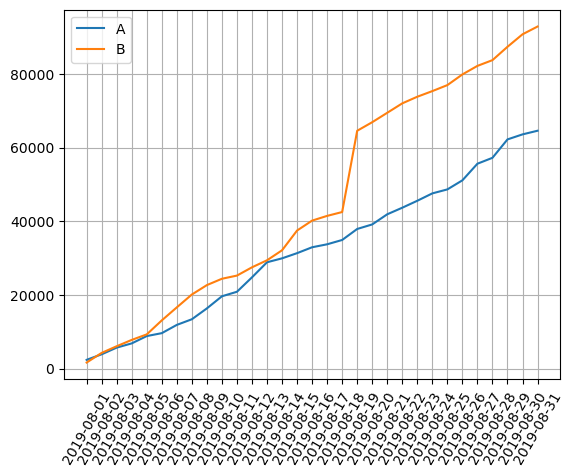

In [19]:
# Create a matrix with unique date-group pairs
datesGroups = orders[['date', 'group']].drop_duplicates() 

# Get the cumulative aggregated daily data for orders
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique, 'visitorId': pd.Series.nunique, 'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])

# Get the cumulative aggregated daily data for visitors
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}), axis=1).sort_values(by=['date', 'group'])

# Merge both tables into one and assign descriptive column names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# DataFrame with cumulative orders and revenue per day for group A
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

# DataFrame with cumulative orders and revenue per day for group B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

# Plot the revenue graph for group A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plot the revenue graph for group B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=60)
plt.grid(True)
plt.legend()

*Conclusions:*

Both groups show a steady growth in revenue throughout the month. However, Group B appears to have a faster growth rate than Group A. Group B has consistently generated more revenue than Group A over the entire observed period. This difference becomes more noticeable as time progresses. Around August 13, there is a more pronounced change in the slope of Group B's line, indicating a sharper increase in revenue compared to the previous period. This could be a point of interest for investigating any event or campaign that took place around that date.

*Hypotheses:*

The difference in growth rates between the groups could suggest that Group B was subject to a more effective intervention or strategy than Group A, resulting in higher revenue. The sharp shift in Group B's trend might be related to a campaign or promotion that took place around August 13. This event could have been highly effective in boosting sales. It is possible that Group A is under different or less favorable conditions, leading to slower revenue growth. This could be due to external factors, demographics, or specific characteristics of Group A. 

***Cumulative average order size by group***

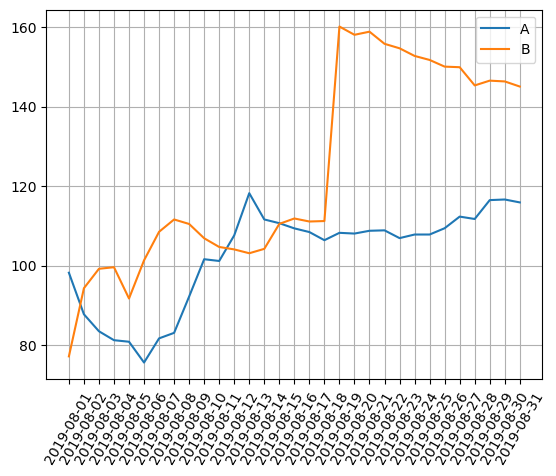

In [22]:
# Divide cumulative revenue by the cumulative number of orders to find the average order size
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=60)
plt.grid(True)
plt.legend()

*Conclusions:*

In this graph, the average order size appears to be more variable than the accumulated revenue. Both groups show fluctuations, with peaks and dips throughout the month. Similar to the previous graph, Group B has a higher average order size than Group A for most of the month. This may be contributing to the higher revenue observed in the previous chart. Around August 15, Group B exhibits a very pronounced peak in the average order size, followed by a decline, although it remains above Group A. This coincides with the revenue increase observed in the previous graph. Group A, after an initial period of fluctuations, seems to stabilize with a more sustained growth in the average order size, suggesting that interventions or changes were less drastic or more uniform compared to Group B.

*Hypotheses:*

The peak in Group B's order size may be related to a specific event, such as a promotion that encouraged customers to make larger purchases during that period. This is also reflected in the revenue increase in the previous graph. Differences in the variability of order size between Groups A and B may suggest different approaches or strategies in marketing or customer segmentation, where Group B might have been exposed to tactics that encouraged larger purchases, although with greater volatility. The previous graph showed that Group B generated more revenue than Group A, and this graph suggests that one of the key factors is the average order size, which is higher in Group B, particularly during certain peaks.

***Relative difference in cumulative average order size for group B compared to group A***

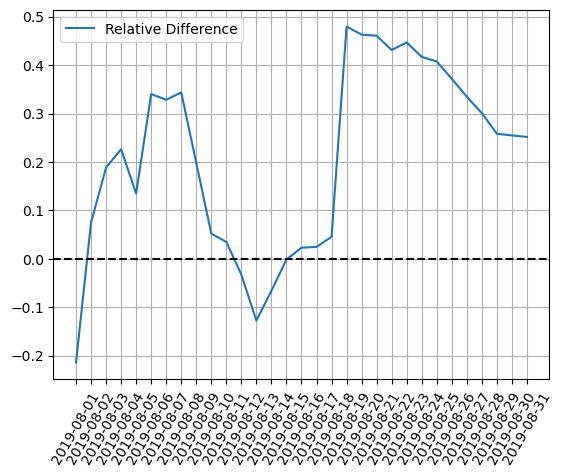

In [25]:
# Merge the data into a single DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Plot a relative difference graph for average order sizes
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / 
         (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1, 
         label='Relative Difference')

# Add the X-axis
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=60)
plt.grid(True)
plt.legend()


*Conclusions:*

The line in the graph shows how the relative difference in average order size varies between groups A and B. When the line is above the horizontal axis (0.0), group B has a higher average order size than group A. When the line falls below 0.0, group A surpasses group B. There is high variability in the relative difference throughout the month. In early August, group B outperforms group A, with the relative difference reaching significant peaks. However, around mid-August (approximately August 11-12), the relative difference briefly reverses, indicating that group A surpasses group B. Similar to previous graphs, there is a peak around August 15, where the relative difference reaches a maximum, indicating that the average order size for group B was considerably higher than for group A at that time. Towards the end of August, the relative difference decreases, although group B still maintains a higher average order size than group A, but the gap narrows.

*Hypotheses:*

As mentioned in the previous graphs, the high variability and peaks in the relative difference could be the result of specific promotions or campaigns that affected the groups differently. It is likely that group B was more responsive to these interventions, especially in the days around August 15. The variability could suggest that the strategies or segmentation of groups A and B were different, leading to an uneven impact on average order size over time. This graph, along with the previous ones, suggests that the higher average order size in group B contributed significantly to the higher accumulated revenue. However, the fact that the relative difference decreases toward the end of the month could indicate a convergence in the behavior of the two groups or a diminishing effect of the promotion or strategy.

***Daily conversion rate of each group as the ratio between orders and the number of visits per day***

(0.0, 30.0, 0.025, 0.04)

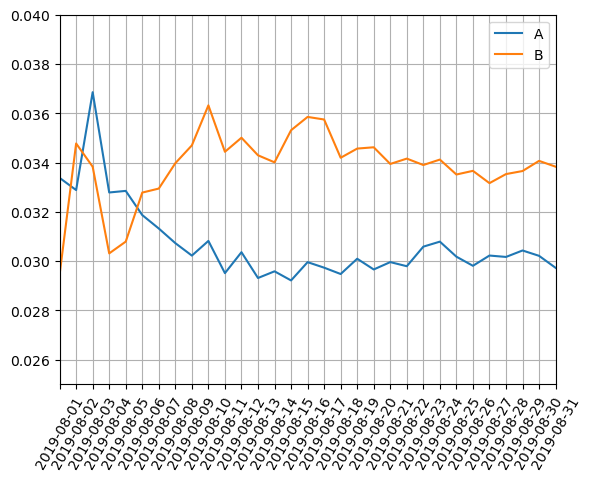

In [28]:
# Calculate cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# Select data for group A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# Select data for group B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# Plot the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=60)
plt.grid(True)
plt.legend()

plt.axis(["2019-08-01", "2019-08-31", 0.025, 0.04])

*Conclusions:*

Both groups exhibit similar behavior in the early days of August, with an initial peak in the cumulative conversion rate followed by stabilization. After August 4, the conversion rates of both groups stabilize, with group B maintaining a slightly higher cumulative conversion rate than group A for most of the month. Throughout August, group B consistently has a higher cumulative conversion rate than group A, although the difference between the two is not very large. However, this steady difference could be significant in terms of revenue impact and the effectiveness of the implemented strategies. Although the cumulative conversion rates tend to stabilize, there is a slight downward trend toward the end of the month, especially in group A, which could indicate market saturation or a decrease in the effectiveness of conversion strategies.

*Hypotheses:*

The higher cumulative conversion rate of group B could result from a more effective marketing strategy or targeted promotions that resonated better with this group. The relatively constant difference suggests that these strategies had a sustained impact throughout the month. While the difference is not dramatic, the fact that group B maintains a higher cumulative conversion rate may be a key indicator of the success of the employed tactics. This, combined with the higher revenue and average order sizes observed in previous charts, reinforces the relative superiority of group B. The slight downward trend in both conversion rates toward the end of August could indicate market saturation, where the effectiveness of conversion strategies declines over time as the target audience becomes exhausted.

***Scatter plot of the number of orders per user***

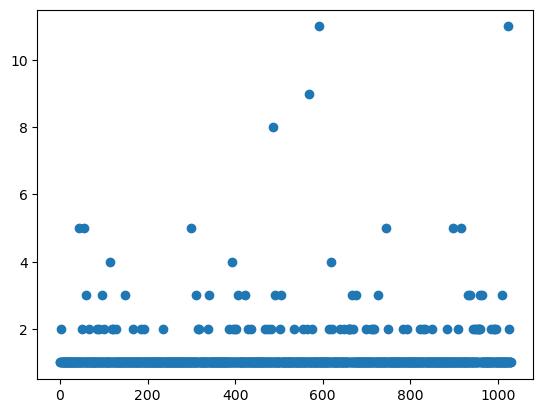

In [31]:
# Filter and group the data
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

# Create values for the X-axis
x_values = pd.Series(range(0, len(ordersByUsers)))

# Plot scatter plot
plt.scatter(x_values, ordersByUsers['orders'])


*Conclusions:*

Most users have placed only one or two orders, as indicated by the dense cluster of points at the lower values of the Y-axis. This suggests that most users are not repeat customers or do not place many orders. A few users have placed a significantly higher number of orders, but these are exceptions. There are a small number of users with more than five orders, and a couple with up to 10 or more. This indicates that there are highly engaged users, but they represent a minority. There does not appear to be a strong relationship between the number of orders and the position in the user list (X-axis). The points are fairly evenly distributed along the X-axis, suggesting that purchasing behavior in terms of order count is not correlated with this index.

*Hypotheses:*

This graph suggests the need for customer segmentation. Most users place few orders, while a small fraction place many. This could be an opportunity to identify and segment the most valuable users (those who place many orders) for personalized marketing or promotions, encouraging them to continue purchasing. The low order frequency among most users could indicate an opportunity to improve retention and loyalty strategies. It might be useful to investigate what factors influence users to place multiple orders and apply those insights to increase purchase frequency among less active users. Although no evident relationship is visible in the graph, further analysis of user behavior patterns could be beneficial. For example, identifying whether there is a specific time period when users tend to place multiple orders or if certain products or promotions drive a higher number of purchases.

***Percentiles and anomalies in the dataset***

In [34]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


A number of orders exceeding the 99th percentile could be considered an anomaly, as it occurs infrequently among users. In this dataset, users who made 4 or more purchases fall within that 1%, making them anomalies.

***Orders price***

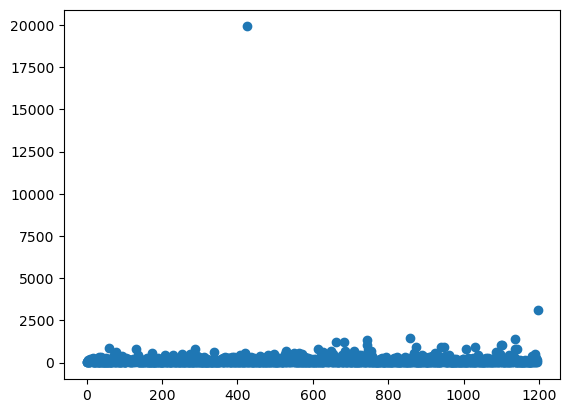

In [37]:
# Create values for the X-axis
x_values = pd.Series(range(0, len(orders['revenue'])))

# Plot the scatter plot
plt.scatter(x_values, orders['revenue'])


*Conclusions:*

Most of the points (representing orders) are clustered near the horizontal axis, indicating that the vast majority of orders have relatively low prices compared to the points higher up in the chart. There are two points that clearly stand out from the rest—one near the value of 20,000 and another around 2,500. These points represent significantly higher order prices than most other orders in the dataset. The overall dispersion of points is fairly uniform in the lower part of the chart, suggesting that the majority of order prices fall within a relatively narrow range. The anomalous points (extremely high prices) are exceptions.

*Hypotheses:*

The two extremely high-price points could be outliers or data entry errors. It is advisable to verify this data to ensure they are not mistakes or special cases. Most orders remain within a relatively low price range, which could indicate that the business deals with affordable products or services and that the more expensive orders are exceptional cases.

***Order prices percentile***

In [40]:
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


Order prices that exceed the 99th percentile could be considered anomalies, as they occur infrequently among users. In this dataset, order prices of 900.90 or higher fall within that 1%, so they are considered anomalies.

***Statistical significance of the difference in conversion between the groups***

In [43]:
# Filtering and aggregating orders by group
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

# Creating samples for comparison
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

# Mann-Whitney U test and relative difference calculation
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
relative_difference = sampleB.mean() / sampleA.mean() - 1

# Formatting and displaying results
print(f"P-value from the Mann-Whitney U test: {p_value:.3f}")
print(f"Relative difference in the average number of orders: {relative_difference:.2%}")


P-value from the Mann-Whitney U test: 0.017
Relative difference in the average number of orders: 13.81%


*Conclusion:*

A p-value of 0.017 suggests that there is a statistically significant difference in the distribution of the number of orders between groups A and B. Since this value is below the typical threshold of 0.05, we can reject the null hypothesis, which states that there is no difference between the groups. The relative difference of 0.138 indicates that, on average, users in group B placed approximately 13.8% more orders than users in group A.

*Hypotheses:*

This suggests that the variability in purchasing behavior (in terms of the number of orders) among users in groups A and B is not random but is influenced by group membership (A or B). Therefore, we can assume that the strategy, treatment, or condition applied to group B has had a distinct impact on user behavior compared to group A.
Although the relative difference is not extremely high, the fact that it is positive suggests that group B responds better in terms of the number of orders. This could indicate that the strategy applied to B is more effective in driving purchases, although it is important to consider the context to determine whether this 13.8% increase is a substantial improvement from a business perspective.

***Statistical significance of the difference in average order size between the groups.***

In [46]:
# Apply the Mann-Whitney U test
p_value = stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]
relative_difference = orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1

print(f"Mann-Whitney U test p-value: {p_value:.3f}")
print(f"Relative difference in average revenue: {relative_difference:.3%}")

Mann-Whitney U test p-value: 0.692
Relative difference in average revenue: 25.165%


*Conclusion:* 

A p-value of 0.692 is much higher than the typical threshold of 0.05, meaning there is not enough evidence to reject the null hypothesis. In this case, the null hypothesis states that there is no significant difference in the average order size between groups A and B. The relative difference of 25.2% indicates that, on average, group B generates orders that are 25.2% larger in value than those in group A.

*Hypothesis:*

This suggests that the average order size between groups A and B is similar, and any observed difference is likely due to chance. Therefore, it does not seem that the strategy applied to the groups has had a significant impact on order size. Although there is a considerable relative difference in average order size, the high p-value (0.692) suggests that this difference is not statistically significant. In other words, even though group B appears to have larger orders, this difference could have occurred simply by chance and not as a result of an effective intervention in group B's strategy.

***Statistical significance of the difference in conversion between groups using the filtered data***

In [49]:
# Select users who have placed 4 or more orders (Anomalous users).
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= 4]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] >= 4]['visitorId']], axis=0)

# Select users who have placed orders with a value greater than or equal to 900.904 (Anomalous users).
usersWithExpensiveOrders = orders[orders['revenue'] >= 900.904]['visitorId']

# Combine both lists of "anomalous" users.
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

# Display the merged result and the number of unique users meeting at least one of the criteria.
print(abnormalUsers.head())
print(abnormalUsers.shape) 

print()
# Calculate the statistical significance of the differences in conversion between groups using filtered data.
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

# Apply the Mann-Whitney U test to the filtered samples:

print(f"Mann-Whitney U test p-value: {stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]:.3f}")
print(f"Relative difference between groups: {(sampleBFiltered.mean() / sampleAFiltered.mean() - 1):.3%}")


1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
Name: visitorId, dtype: int64
(20,)

Mann-Whitney U test p-value: 0.014
Relative difference between groups: 15.103%


*Conclusions:*

There is a significant difference between groups A and B in terms of conversion rate after removing anomalies (users with many orders or high-value orders). Group B has a higher conversion rate than group A, suggesting that the interventions or experiments applied to group B may be more effective in driving conversions.

*Hypotheses:*

It is likely that the anomalies were skewing the original results. Filtering this data has allowed for a more representative analysis. The higher conversion rate in group B may indicate that a specific characteristic of this group (e.g., user experience or targeted campaigns) is improving conversions compared to group A.

***Statistical significance of the difference in average order size between groups using the filtered data.***

In [52]:
# Apply the same test but remove anomalies from the average order size of the groups
filtered_revenue_A = orders[(orders['group'] == 'A') & (~orders['visitorId'].isin(abnormalUsers))]['revenue']
filtered_revenue_B = orders[(orders['group'] == 'B') & (~orders['visitorId'].isin(abnormalUsers))]['revenue']

# Mann-Whitney U test on the filtered data
p_value = stats.mannwhitneyu(filtered_revenue_A, filtered_revenue_B)[1]
relative_difference = filtered_revenue_B.mean() / filtered_revenue_A.mean() - 1

print(f"Mann-Whitney U test p-value: {p_value:.3f}")
print(f"Relative difference in average order size: {relative_difference:.3%}")


Mann-Whitney U test p-value: 0.913
Relative difference in average order size: -1.379%


*Conclusions:*

The p-value is very high, indicating that there is no significant difference in the average order size between the two groups. This means that the null hypothesis, which states that the average order sizes in groups A and B are statistically equal, cannot be rejected. The difference in means shows that the variation in average order size between the two groups is practically negligible, with a slight difference in favor of group A, but it is statistically insignificant given the p-value.

There is not enough evidence to claim that there is a significant difference in average order size between groups A and B, even after filtering out anomalies. The average order sizes are virtually identical in both groups, suggesting that any variation is due to random chance rather than an underlying factor in the experiments or interventions applied.

*Hypotheses:*

Since the average order size is similar between both groups, it appears that the intervention (if there was one) did not affect user behavior in terms of the amount they spend per order.

The differences observed in other aspects (such as conversion rates) are not reflected in the average order size, which may indicate that, although users in group B converted at a higher rate, the value per order did not change significantly.


**OVERALL CONCLUSIONS**

Based on the analyzed results, we can conclude that there is no significant overall difference between the groups in terms of revenue impact. While there is a statistically significant difference in conversion rates, with Group B showing a higher conversion than Group A, the average order size remains similar between the groups, meaning that although Group B converts more users, the revenue per order does not increase. Additionally, after filtering out users with extreme behaviors, such as exceptionally high-value orders or an unusually high number of orders, the results remained largely unchanged, suggesting that anomalies were not the primary drivers of the observed differences.

***Reasons to Stop the Test:***

No Clear Revenue Gains: Although Group B has a higher conversion rate, the average order size does not differ between groups, meaning there is no observed increase in overall revenue per user.

No Expectation of Further Meaningful Changes: Given the current results, it is unlikely that extending the test would reveal a significant advantage for Group B that has not already been detected.

Resource Optimization: Continuing the test may not be the best use of time and resources, as no substantial difference in revenue or customer behavior is expected beyond what has already been measured.